# Prospers Loan Dataset Exploration
## by Mostafa ElZayat

## Preliminary Wrangling


In [845]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [423]:
## reading data 

loans = pd.read_csv('/Users/mostafa/Downloads/prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [434]:
### High level data exploration
## shape of dataset , duplicated and data types

print(loans.shape)
print(loans.duplicated().sum())
print(loans.dtypes.value_counts())

(113937, 81)
0
float64    50
object     17
int64      11
bool        3
dtype: int64


### What is the structure of your dataset?

**Original Dataset**
> This dataset consists of 113937 rows representing differencet customers application of Loans with 81 feature columns as follows:
   >> - 50           float
   >> - 17           categorical
   >> - 11           int 
   >> - 3            boolean
   
**Investigation Dataset**
> This dataset is subset of original dataset with 15 columns of interest to be explored there data types are as follows
   >> - 5           float
   >> - 5           categorical
   >> - 5           int 

**Clean Dataset**
> This dataset is a cleaner versoin of investigation dataframe 'df_loans' with no null values and no duplicates, for the sake of this exercise null values and duplicates have been dropped while maintating **96%** of the data 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**Investigation Dataset**

> Below is a list of colums considred in this nalysis as features of interest
        >> - EmploymentStatus
        >> - LoanStatus
        >> - **BorrowerAPR**
        >> - **BorrowerRate**
        >> - ProsperScore
        >> - Occupation
        >> - IncomeRange
        >> - StatedMonthlyIncome
        >> - **LoanOriginalAmount**
        >> - LoanOriginationDate
        >> - MonthlyLoanPayment
        >> - Recommendations
        >> - InvestmentFromFriendsCount
        >> - InvestmentFromFriendsAmount
        >> - Investors


In [897]:
colms = [
'EmploymentStatus'
,'LoanStatus'
,'BorrowerAPR'
,'BorrowerRate'
,'Occupation'
,'IncomeRange'
,'StatedMonthlyIncome'
,'LoanOriginalAmount'
,'LoanOriginationDate'
,'MonthlyLoanPayment'
,'Recommendations'
,'InvestmentFromFriendsCount'
,'InvestmentFromFriendsAmount'
,'Investors'
,'ListingCategory(numeric)'
]

loans.columns = loans.columns.str.replace(' ','')
df_loans = loans[colms]
df_loans

,EmploymentStatus,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory(numeric)
0,Self-employed,Completed,0.16516,0.1580,Other,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00,330.43,0,0,0.0,258,0
1,Employed,Current,0.12016,0.0920,Professional,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00,318.93,0,0,0.0,1,2
2,Not available,Completed,0.28269,0.2750,Other,Not displayed,2083.333333,3001,2007-01-17 00:00:00,123.32,0,0,0.0,41,0
3,Employed,Current,0.12528,0.0974,Skilled Labor,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00,321.45,0,0,0.0,158,16
4,Employed,Current,0.24614,0.2085,Executive,"$100,000+",9583.333333,15000,2013-09-20 00:00:00,563.97,0,0,0.0,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,Employed,Current,0.22354,0.1864,Food Service Management,"$50,000-74,999",4333.333333,10000,2013-04-22 00:00:00,364.74,0,0,0.0,1,1
113933,Employed,FinalPaymentInProgress,0.13220,0.1110,Professional,"$75,000-99,999",8041.666667,2000,2011-11-07 00:00:00,65.57,0,0,0.0,22,7
113934,Employed,Current,0.23984,0.2150,Other,"$25,000-49,999",2875.000000,10000,2013-12-23 00:00:00,273.35,0,0,0.0,119,1
113935,Full-time,Completed,0.28408,0.2605,Food Service,"$25,000-49,999",3875.000000,15000,2011-11-21 00:00:00,449.55,0,0,0.0,274,2


In [498]:
## High level on df_columns data frame with columns of interest 

print(df_loans.shape)
print(df_loans.duplicated().sum())
print(df_loans.dtypes.value_counts())

(113937, 15)
876
object     5
float64    5
int64      5
dtype: int64


In [898]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EmploymentStatus             111682 non-null  object 
 1   LoanStatus                   113937 non-null  object 
 2   BorrowerAPR                  113912 non-null  float64
 3   BorrowerRate                 113937 non-null  float64
 4   Occupation                   110349 non-null  object 
 5   IncomeRange                  113937 non-null  object 
 6   StatedMonthlyIncome          113937 non-null  float64
 7   LoanOriginalAmount           113937 non-null  int64  
 8   LoanOriginationDate          113937 non-null  object 
 9   MonthlyLoanPayment           113937 non-null  float64
 10  Recommendations              113937 non-null  int64  
 11  InvestmentFromFriendsCount   113937 non-null  int64  
 12  InvestmentFromFriendsAmount  113937 non-null  float64
 13 

In [493]:
## checking for different data types in dataframe

print(df_loans.dtypes.value_counts())
for i in df_loans.dtypes:
    x = df_loans.columns.to_series().groupby(loans.dtypes).groups
    y = {k.name: v for k, v in x.items()}
print(y)

object     5
float64    5
int64      5
dtype: int64
{'int64': Index(['LoanOriginalAmount', 'Recommendations', 'InvestmentFromFriendsCount',
       'Investors', 'ListingCategory(numeric)'],
      dtype='object'), 'float64': Index(['BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome',
       'MonthlyLoanPayment', 'InvestmentFromFriendsAmount'],
      dtype='object'), 'object': Index(['EmploymentStatus', 'LoanStatus', 'Occupation', 'IncomeRange',
       'LoanOriginationDate'],
      dtype='object')}


## EDA and data cleaning 

 - Filling Na
 - Duplicates
 - Data types conversion
 - Data quality checks


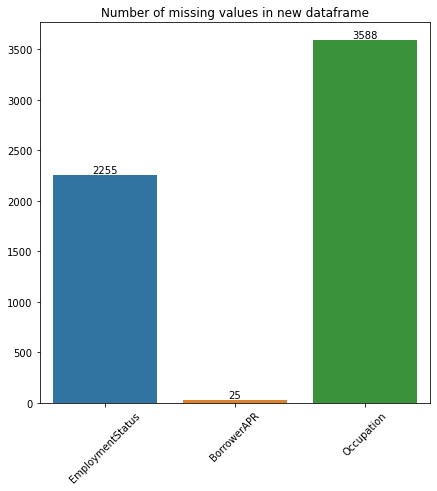

In [899]:
## Null values 

null_cols      = df_loans[df_loans.columns[df_loans.isnull().any()]]
null_cols_vals = null_cols.isna().sum()

plt.figure(figsize = [7,7])

sns.barplot( null_cols_vals.index.values,  null_cols_vals , order = null_cols_vals.index);
plt.xticks(rotation = 45);
plt.title("Number of missing values in new dataframe");
for i in range(null_cols_vals.shape[0]):
    count = null_cols_vals[i]
    
    plt.text(i, count+100 , count , ha = 'center', va = 'top')

In [490]:
(df_loans.isnull().sum() > 0).value_counts()

False    12
True      3
dtype: int64

In [494]:
df_loans.columns[df_loans.isna().any()]

Index(['EmploymentStatus', 'BorrowerAPR', 'Occupation'], dtype='object')

In [495]:
(df_loans.isna().sum() * 100 / len(df_loans)).sort_values(ascending = False)

Occupation                     3.149109
EmploymentStatus               1.979164
BorrowerAPR                    0.021942
LoanStatus                     0.000000
BorrowerRate                   0.000000
IncomeRange                    0.000000
StatedMonthlyIncome            0.000000
LoanOriginalAmount             0.000000
LoanOriginationDate            0.000000
MonthlyLoanPayment             0.000000
Recommendations                0.000000
InvestmentFromFriendsCount     0.000000
InvestmentFromFriendsAmount    0.000000
Investors                      0.000000
ListingCategory(numeric)       0.000000
dtype: float64

In [549]:
df_clean = df_loans.dropna()
df_clean

,EmploymentStatus,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory(numeric)
0,Self-employed,Completed,0.16516,0.1580,Other,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00,330.43,0,0,0.0,258,0
1,Employed,Current,0.12016,0.0920,Professional,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00,318.93,0,0,0.0,1,2
2,Not available,Completed,0.28269,0.2750,Other,Not displayed,2083.333333,3001,2007-01-17 00:00:00,123.32,0,0,0.0,41,0
3,Employed,Current,0.12528,0.0974,Skilled Labor,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00,321.45,0,0,0.0,158,16
4,Employed,Current,0.24614,0.2085,Executive,"$100,000+",9583.333333,15000,2013-09-20 00:00:00,563.97,0,0,0.0,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,Employed,Current,0.22354,0.1864,Food Service Management,"$50,000-74,999",4333.333333,10000,2013-04-22 00:00:00,364.74,0,0,0.0,1,1
113933,Employed,FinalPaymentInProgress,0.13220,0.1110,Professional,"$75,000-99,999",8041.666667,2000,2011-11-07 00:00:00,65.57,0,0,0.0,22,7
113934,Employed,Current,0.23984,0.2150,Other,"$25,000-49,999",2875.000000,10000,2013-12-23 00:00:00,273.35,0,0,0.0,119,1
113935,Full-time,Completed,0.28408,0.2605,Food Service,"$25,000-49,999",3875.000000,15000,2011-11-21 00:00:00,449.55,0,0,0.0,274,2


In [540]:
# percentage of new dataset df_clean from orignal dataframe loans

print("New dataframe with no nulls is" , '{:0.2f}%'.format(df_clean.shape[0]*100 / len(loans)) , "% of orignal dataframe")

New dataframe with no nulls is 96.85% % of orignal dataframe


In [550]:
## Duplicates

print(df_clean.duplicated().sum())
 
# Percentage after dropping duplicates respect to original data set    
    
print("New dataframe with no nulls and duplicates is" , '{:0.2f}%'.format(df_clean.drop_duplicates().shape[0]* 100 / len(loans)) , "% of orignal dataframe")

817
New dataframe with no nulls and duplicates is 96.13% % of orignal dataframe


In [551]:
df_clean.drop_duplicates(inplace = True)

In [555]:
## Data types conversions and renaming columns

## rename listing category column

df_clean.rename(columns = {'ListingCategory(numeric)' :'listing_category'} , inplace = True)

## Loan original data is defined as object data type so need to change it to date time data type

df_clean['LoanOriginationDate'] = pd.to_datetime(df_clean['LoanOriginationDate'])
df_clean.dtypes.value_counts()

float64           5
int64             5
object            4
datetime64[ns]    1
dtype: int64

In [695]:
## clean up listing_category as nominal vairable with cateogories

cleanup_nums = {"listing_category":     
                {  0: 'Not Available'
                 , 1: 'Debt Consolidation'
                 , 2: 'Home Improvement'
                 , 3: 'Business'
                 , 4: 'Personal Loan'
                 , 5: 'student Use'
                 , 6: 'Auto'
                 , 7: 'Other'
                 , 8: 'Baby&Adoption'
                 , 9: 'Boat'
                 , 10: 'Cosmetic / Procedure'
                 , 11: 'Engagement Ring'
                 , 12: 'Green Loans'
                 , 13: 'Hhousehold Expenses'
                 , 14: 'Large Purchases'
                 , 15: 'Medical/Dental'
                 , 16: 'Motorcycle'
                 , 17: 'RV'
                 , 18: 'Taxes'
                 , 19: 'Vacation'
                 , 20: 'Wedding Loans'
                }}

In [697]:
df_clean = df_clean.replace(cleanup_nums)
df_clean.head(10)

,EmploymentStatus,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,listing_category
0,Self-employed,Completed,0.16516,0.1580,Other,"$25,000-49,999",3083.333333,9425,2007-09-12,330.43,0,0,0.0,258,Not Available
1,Employed,Current,0.12016,0.0920,Professional,"$50,000-74,999",6125.000000,10000,2014-03-03,318.93,0,0,0.0,1,Home Improvement
2,Not available,Completed,0.28269,0.2750,Other,Not displayed,2083.333333,3001,2007-01-17,123.32,0,0,0.0,41,Not Available
3,Employed,Current,0.12528,0.0974,Skilled Labor,"$25,000-49,999",2875.000000,10000,2012-11-01,321.45,0,0,0.0,158,Motorcycle
4,Employed,Current,0.24614,0.2085,Executive,"$100,000+",9583.333333,15000,2013-09-20,563.97,0,0,0.0,20,Home Improvement
5,Employed,Current,0.15425,0.1314,Professional,"$100,000+",8333.333333,15000,2013-12-24,342.37,0,0,0.0,1,Debt Consolidation
6,Employed,Current,0.31032,0.2712,Sales - Retail,"$25,000-49,999",2083.333333,3000,2013-04-18,122.67,0,0,0.0,1,Debt Consolidation
7,Employed,Current,0.23939,0.2019,Laborer,"$25,000-49,999",3355.750000,10000,2013-05-13,372.60,0,0,0.0,1,Home Improvement
8,Employed,Current,0.07620,0.0629,Food Service,"$25,000-49,999",3333.333333,10000,2013-12-12,305.54,0,0,0.0,1,Other
10,Employed,Current,0.27462,0.2489,Fireman,"$75,000-99,999",7500.000000,13500,2012-05-17,395.37,0,0,0.0,19,Debt Consolidation


> **df_clean** is now a clean dataset with no null values, duplicates so we are ready to go to next step and start data exploration 

In [698]:

df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
BorrowerAPR,109532.0,0.219515,0.080744,0.00653,0.15629,0.210250,0.285440,4.239500e-01
BorrowerRate,109532.0,0.193234,0.075114,0.00000,0.13420,0.184000,0.251100,3.600000e-01
StatedMonthlyIncome,109532.0,5636.324330,7584.093974,0.00000,3250.00000,4666.666667,6833.333333,1.750003e+06
LoanOriginalAmount,109532.0,8397.743381,6259.145526,1000.00000,4000.00000,6500.000000,12000.000000,3.500000e+04
MonthlyLoanPayment,109532.0,274.421556,193.022458,0.00000,133.80000,220.955000,372.710000,2.251510e+03
Recommendations,109532.0,0.049912,0.338767,0.00000,0.00000,0.000000,0.000000,3.900000e+01
InvestmentFromFriendsCount,109532.0,0.024395,0.236972,0.00000,0.00000,0.000000,0.000000,3.300000e+01
InvestmentFromFriendsAmount,109532.0,17.215452,300.390723,0.00000,0.00000,0.000000,0.000000,2.500000e+04
Investors,109532.0,82.234105,104.287700,1.00000,2.00000,45.000000,118.000000,1.189000e+03





### Main features of interest in the dataset

> The aim is to understand which varaibles affescts the Loan status for for different customer loan applications

> Investigate if the following variabls correlate to loan status:
    >> - Borrowers APR
    >> - Interest Rate
    >> - Original loan amount
    >> - Monthly loan payment


**Notes** 

> we can see how these users had on Average more investors than the rest of the sample data

> Also they enjoy a Lower Credit score Range that is slightly higher than the average Lower Credit score of all customers

## Univariate Exploration


### Investigating categorical variables 

In [699]:
## Exploration of categorical variabels [Employment status , Loan status , Occupation , Income range]

df_clean.select_dtypes(include = ['object']).dtypes

EmploymentStatus    object
LoanStatus          object
Occupation          object
IncomeRange         object
listing_category    object
dtype: object

In [700]:
## getting value counts for each object type variable

empl_counts = df_clean.EmploymentStatus.value_counts()
loan_counts = df_clean.LoanStatus.value_counts()
occp_counts = df_clean.Occupation.value_counts()
Incm_counts = df_clean.IncomeRange.value_counts()
list_counts = df_clean.listing_category.value_counts()

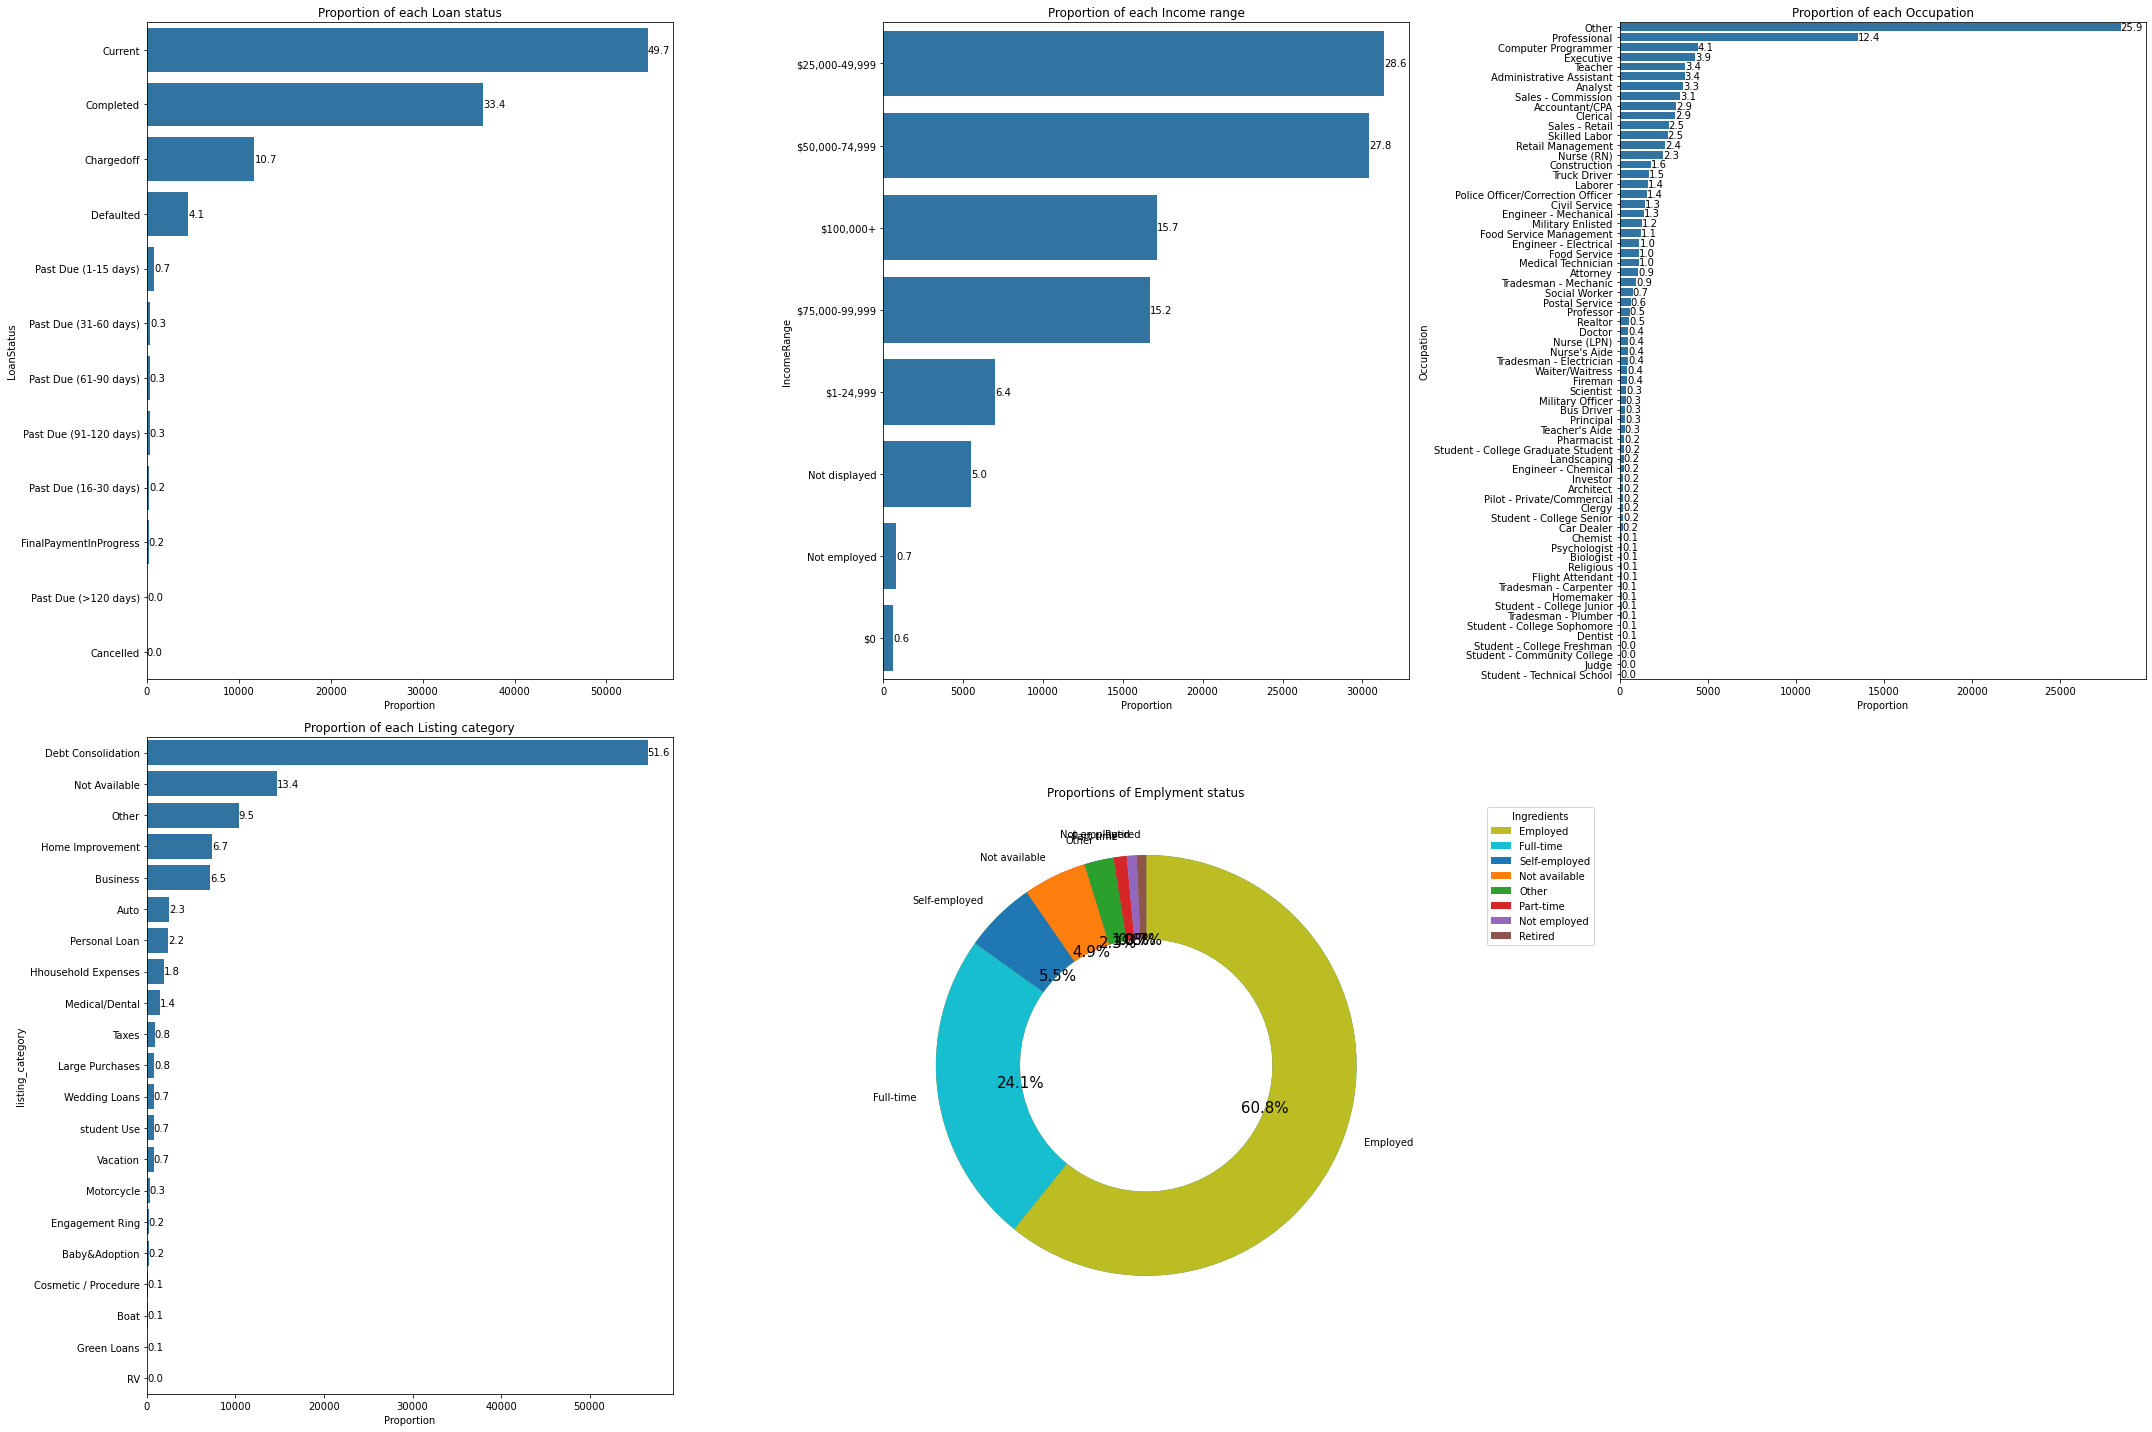

In [877]:
## using subplots to plot explore all categorical variables

base_color = sns.color_palette()[0]
plt.figure(figsize = [30,20])

## Bar plot for Loan status proportions

plt.subplot(2,3,1)
max_loan_prop = loan_counts[0] / loan_counts.sum()
loan_ticks = np.arange(0 , max_loan_prop , 0.02)
loan_ticks_names = ['{:0.2f}'.format(v) for v in loan_ticks]
sns.countplot(data = df_clean , y  = 'LoanStatus' , color = base_color , order = loan_counts.index)
for i in range (loan_counts.shape[0]):
    count = loan_counts[i]
    pct_string = '{:0.1f}'.format(100*count/loan_counts.sum())
    plt.text(count+1, i, pct_string, va='center')
plt.xlabel('Proportion')
plt.title("Proportion of each Loan status");
plt.tight_layout()


## Bar plot for Income ranges proportions

plt.subplot(2,3,2)
max_inc_prop = Incm_counts[0] / Incm_counts.sum()
inc_ticks = np.arange(0 , max_inc_prop , 0.02)
inc_ticks_names = ['{:0.2f}'.format(v) for v in empl_ticks]
sns.countplot(data = df_clean , y  = 'IncomeRange' , color = base_color , order = Incm_counts.index)
for i in range (Incm_counts.shape[0]):
    count = Incm_counts[i]
    pct_string = '{:0.1f}'.format(100*count/Incm_counts.sum())
    plt.text(count+1, i, pct_string, va='center')
plt.xlabel('Proportion')
plt.title("Proportion of each Income range");
plt.tight_layout()


## Bar plot for occupatoin proportions

plt.subplot(2,3,3)
max_occ_prop = occp_counts[0] / occp_counts.sum()
occ_ticks = np.arange(0 , max_occ_prop , 0.02)
occ_ticks_names = ['{:0.2f}'.format(v) for v in occ_ticks]
sns.countplot(data = df_clean , y  = 'Occupation' , color = base_color , order = occp_counts.index)
for i in range (occp_counts.shape[0]):
    count = occp_counts[i]
    pct_string = '{:0.1f}'.format(100*count/occp_counts.sum())
    plt.text(count+1, i, pct_string, va='center')
plt.xlabel('Proportion')
plt.title("Proportion of each Occupation");
plt.tight_layout()

## Bar plot for Listing category proportions

plt.subplot(2,3,4)
max_list_prop = list_counts[0] / list_counts.sum()
list_ticks = np.arange(0 , max_list_prop , 0.02)
list_ticks_names = ['{:0.2f}'.format(v) for v in list_ticks]
sns.countplot(data = df_clean , y  = 'listing_category' , color = base_color , order = list_counts.index)
for i in range (list_counts.shape[0]):
    count = list_counts[i]
    pct_string = '{:0.1f}'.format(100*count/list_counts.sum())
    plt.text(count+1, i, pct_string, va='center')
plt.xlabel('Proportion')
plt.title("Proportion of each Listing category");
plt.tight_layout()

## pie plot for Employment status counts

plt.subplot(2,3,5)
plt.pie(empl_conuts, labels = empl_conuts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = plt.pie(empl_conuts, autopct=lambda pct: func(pct, empl_conuts),
                                  textprops=dict(color="black") ,  startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4} )

plt.legend(wedges, empl_conuts.index.values,
          title="Ingredients",
          loc="upper center",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Proportions of Emplyment status')
plt.setp(autotexts, size=15)
plt.tight_layout()
plt.show()

> The categorical vairables dashboard above shows the different categorical variables with relative frequency 

### Investigating numerical variables 

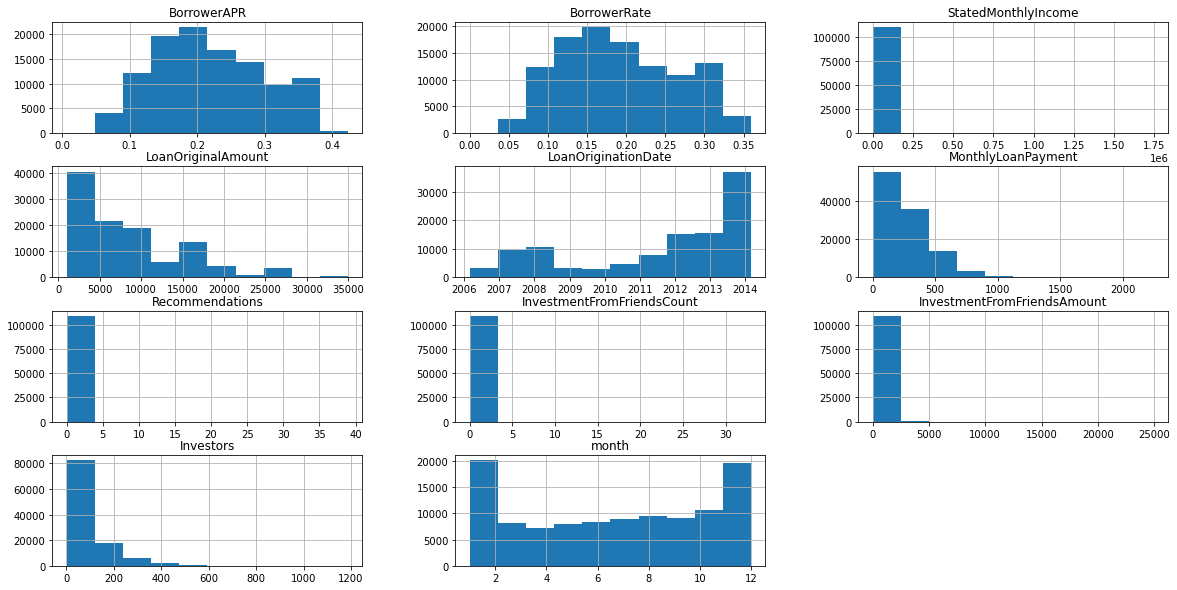

In [878]:
df_clean.hist(figsize = [20,10]);

In [759]:
df_clean[['BorrowerAPR' , 'BorrowerRate' , 'LoanOriginalAmount' , 'MonthlyLoanPayment' ]].describe()

,BorrowerAPR,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment
count,109532.000000,109532.000000,109532.000000,109532.000000
mean,0.219515,0.193234,8397.743381,274.421556
std,0.080744,0.075114,6259.145526,193.022458
min,0.006530,0.000000,1000.000000,0.000000
25%,0.156290,0.134200,4000.000000,133.800000
50%,0.210250,0.184000,6500.000000,220.955000
75%,0.285440,0.251100,12000.000000,372.710000
max,0.423950,0.360000,35000.000000,2251.510000


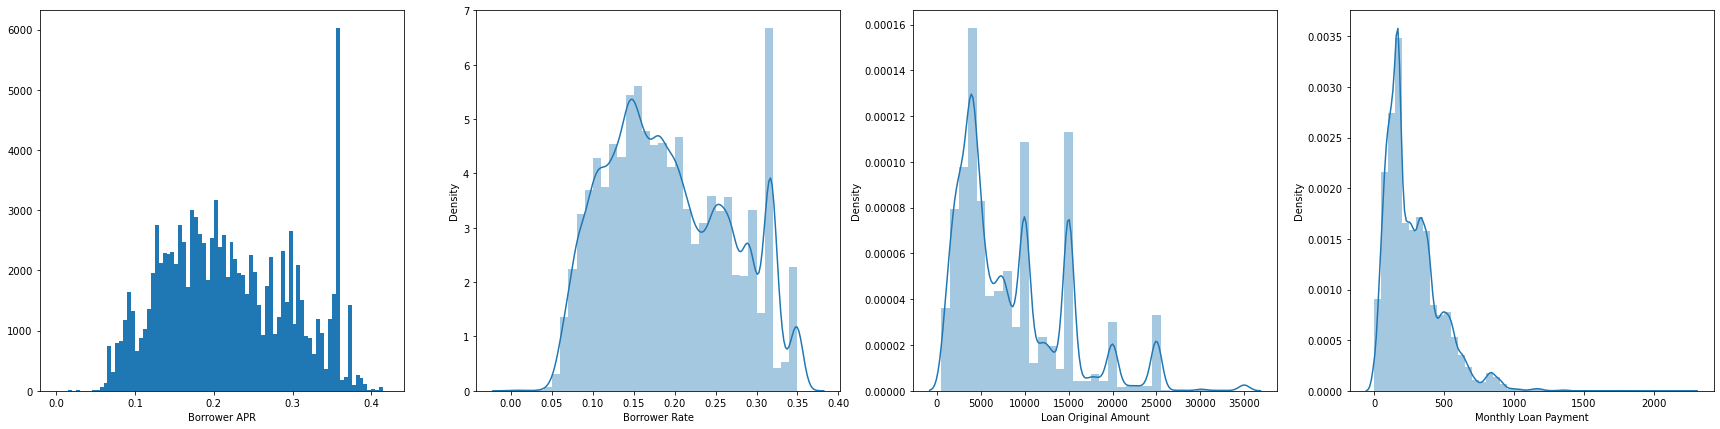

In [846]:
plt.figure(figsize = [30,7])

# histogram for Borrower Apr

plt.subplot(1,4,1)
apr_bins = np.arange(0 , df_clean.BorrowerAPR.max() , 0.005)
plt.hist(data = df_clean , x = 'BorrowerAPR' , bins = apr_bins);
plt.xlabel('Borrower APR');

# distribution plot for Borrower rate

plt.subplot(1,4,2)
rate_bins = np.arange(0 , df_clean.BorrowerRate.max() , 0.01 )
sns.distplot(df_clean['BorrowerRate'] , bins = rate_bins);
plt.xlabel('Borrower Rate');

# distribution plot for loan original amount

plt.subplot(1,4,3)
orgamt_bins = np.arange(500 , df_clean.LoanOriginalAmount.max() , 1000)
sns.distplot(df_clean.LoanOriginalAmount , bins = orgamt_bins);
plt.xlabel('Loan Original Amount');

# distribution plot for monthly loan payment

plt.subplot(1,4,4)
mlp_bins = np.arange(0 , df_clean.MonthlyLoanPayment.max() , 50)
sns.distplot(df_clean.MonthlyLoanPayment , bins = mlp_bins);
plt.xlabel('Monthly Loan Payment');

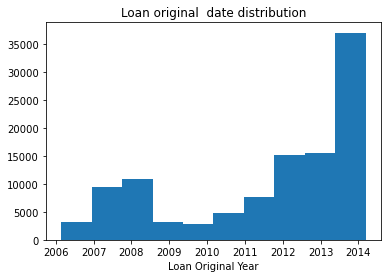

In [859]:
plt.hist(data = df_clean , x = 'LoanOriginationDate');
plt.title('Loan original  date distribution')
plt.xlabel('Loan Original Year');

> A general distribution of for each of the numerical variables is presented in the above histrograms 

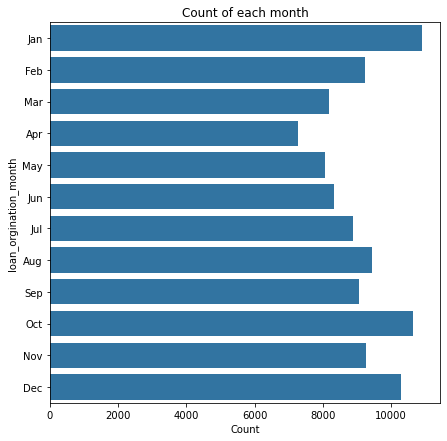

In [741]:
### Data engineering ###

# extracting month from loan orgination data

df_clean['loan_orgination_month'] = df_clean.LoanOriginationDate.dt.strftime('%b')

plt.figure(figsize = [7,7])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_conuts = df_clean.loan_orgination_month.value_counts()
sns.countplot(data = df_clean , y = 'loan_orgination_month' , color = base_color , order = months)
plt.xlabel('Count')
plt.title("Count of each month");

#### **Uni-variate visualisations conclusions:**

**Categorical**
   - Almost 56% of loans given where to employees with Income range between ~ 25K - 75K USD 
   - 51.6% of Listings category is Debt Consolidation 
   - Employees are more likely to get approved for a loan application
 
**Numerical**
   - Borrower Rate and Borrower APR are similar in distribution 
   - Right skewed distribution for Monthly loan payment which can be interesting to investigate more if outliers have an effect in this distribution 
   - There is a trend around april where less loan applications are entered to the system which could be due to yearly vacations or needs more input from domain expert

**Datetime**
   - In more recent year we can see an exponential growth in number of loans at year 2014

## Bivariate Exploration

> In the coming figures a mix between boxplots and violin plots are used to show summary statistics between different categorical and numerical variables 

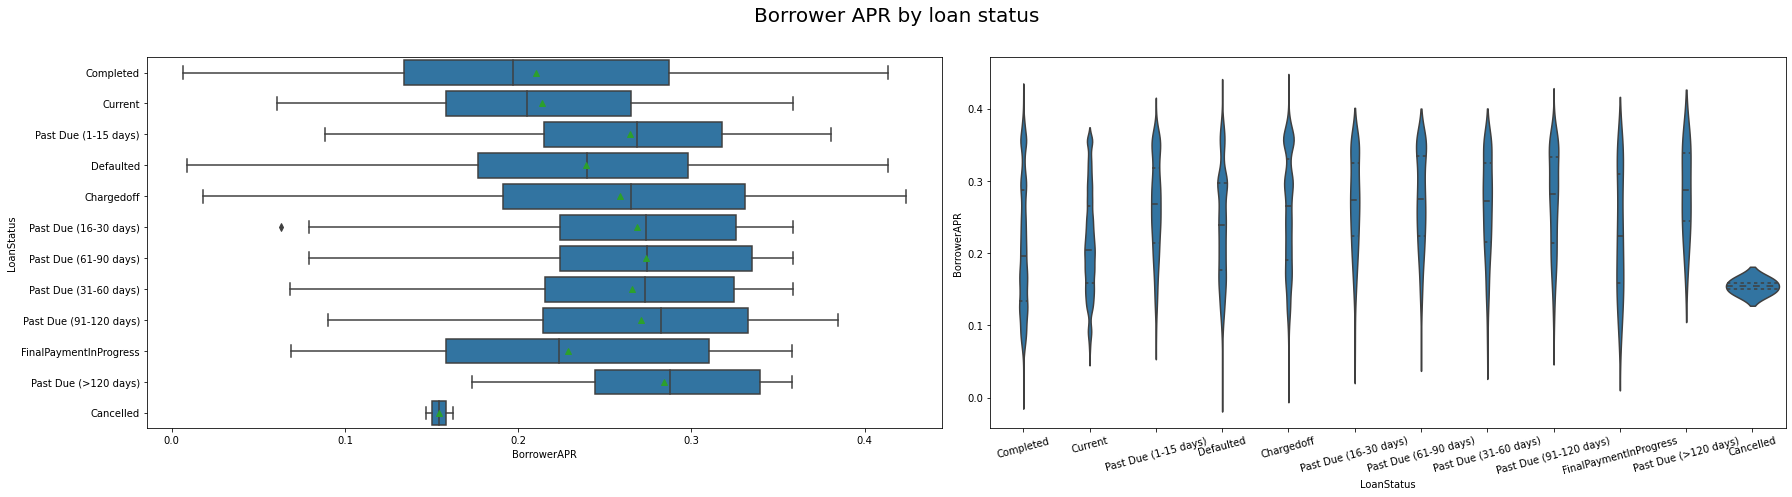

In [874]:
## Investigatoin relation between categogrical and numerical variable

## relaton between loan status and Borrower RPA

fig = plt.figure(figsize = (25,7))



plt.subplot(1,2,1)
sns.boxplot(data = df_clean ,y = 'LoanStatus' , x = df_clean.BorrowerAPR, showmeans = True , color = base_color);
plt.tight_layout()

plt.subplot(1,2,2)
sns.violinplot(data = df_clean , x = 'LoanStatus' , y = 'BorrowerAPR' ,  color = base_color , inner = 'quartile');
plt.xticks(rotation = 15);
plt.tight_layout()

fig.suptitle('Borrower APR by loan status' , size = 20);
fig.subplots_adjust(top=0.88)

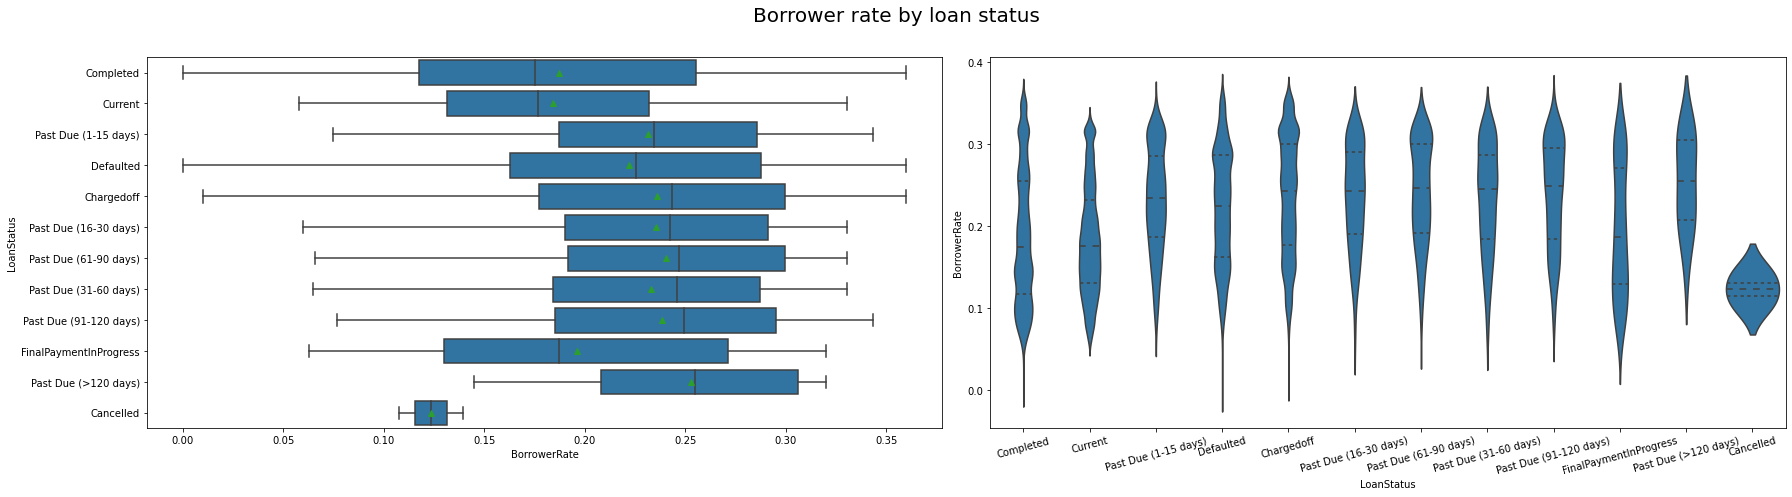

In [873]:
## Investigating relation between categogrical and numerical variable

## relaton between loan status and Borrower Rate

fig = plt.figure(figsize = (25,7))

plt.subplot(1,2,1)
sns.boxplot(data = df_clean ,y = 'LoanStatus' , x = 'BorrowerRate' , showmeans = True ,  color = base_color);
plt.tight_layout()

plt.subplot(1,2,2)
sns.violinplot(data = df_clean , x = 'LoanStatus' , y = 'BorrowerRate' , color = base_color , inner = 'quartile');
plt.xticks(rotation = 15);
plt.tight_layout()

fig.suptitle('Borrower rate by loan status' , size = 20);
fig.subplots_adjust(top=0.88)

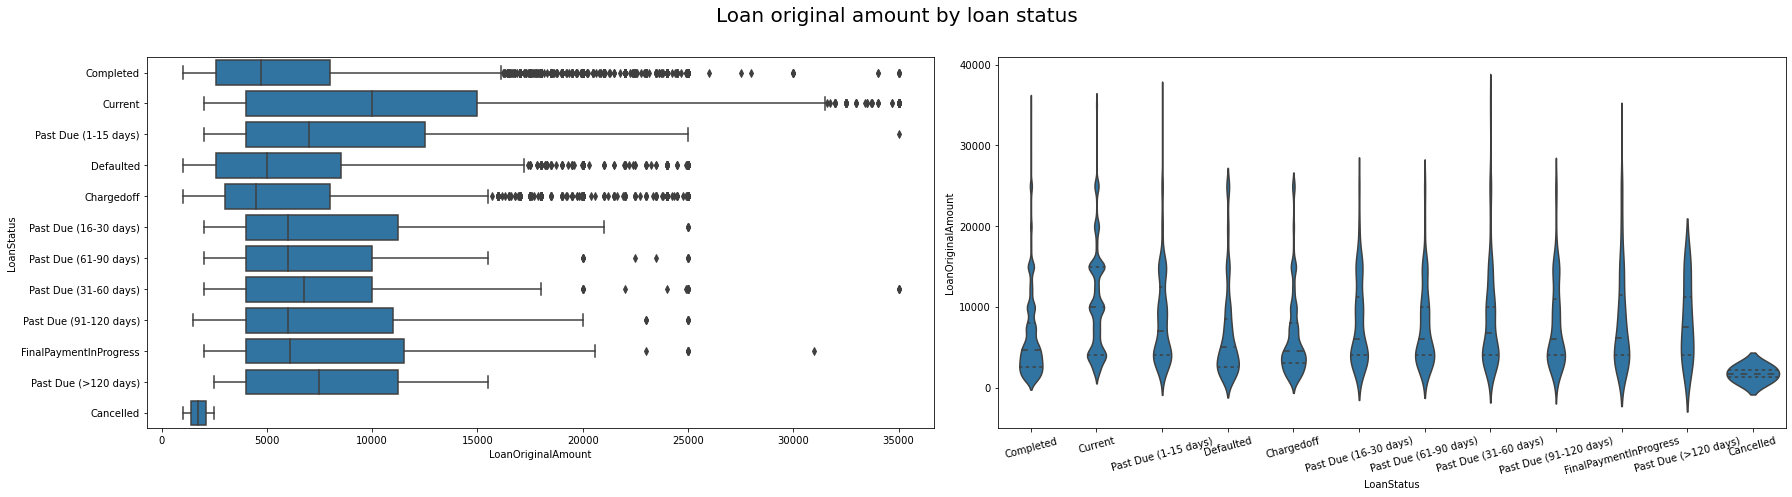

In [872]:
## Investigating relation between categogrical and numerical variable

## relaton between loan status and Loan original amount

fig = plt.figure(figsize = (25,7))

plt.subplot(1,2,1)
sns.boxplot(data = df_clean ,y = 'LoanStatus' , x = 'LoanOriginalAmount' , color = base_color);
plt.tight_layout()

plt.subplot(1,2,2)
sns.violinplot(data = df_clean , x = 'LoanStatus' , y = 'LoanOriginalAmount' , color = base_color , inner = 'quartile');
plt.xticks(rotation = 15);
plt.tight_layout()

fig.suptitle('Loan original amount by loan status' , size = 20);
fig.subplots_adjust(top=0.88)

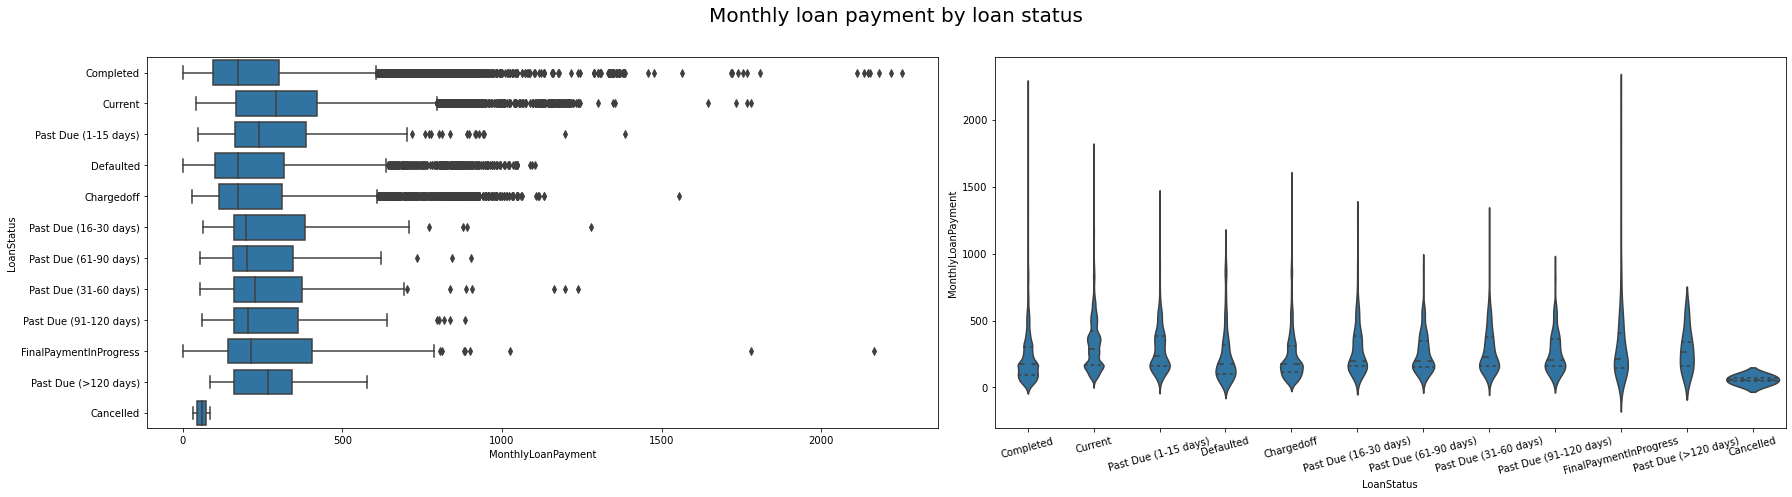

In [870]:
## Investigating relation between categogrical and numerical variable

## relaton between loan status and Monthly loan payment

fig = plt.figure(figsize = (25,7))


plt.subplot(1,2,1)
sns.boxplot(data = df_clean ,y = 'LoanStatus' , x = 'MonthlyLoanPayment' , color = base_color);
plt.tight_layout()

plt.subplot(1,2,2)
sns.violinplot(data = df_clean , x = 'LoanStatus' , y = 'MonthlyLoanPayment' , color = base_color , inner = 'quartile');
plt.xticks(rotation = 15);
plt.tight_layout()

fig.suptitle('Monthly loan payment by loan status' , size = 20);
fig.subplots_adjust(top=0.88)


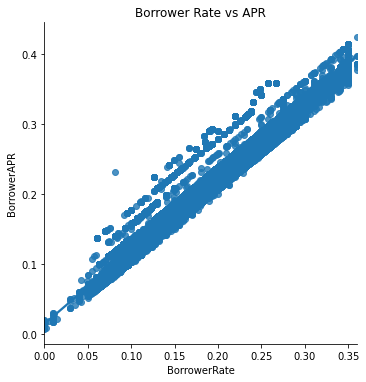

In [887]:
sns.lmplot(data = df_clean , x = 'BorrowerRate' , y = 'BorrowerAPR');
plt.title('Borrower Rate vs APR');

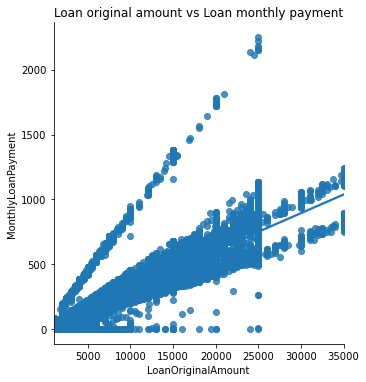

In [888]:
sns.lmplot(data = df_clean , x = 'LoanOriginalAmount' , y = 'MonthlyLoanPayment');
plt.title('Loan original amount vs Loan monthly payment');

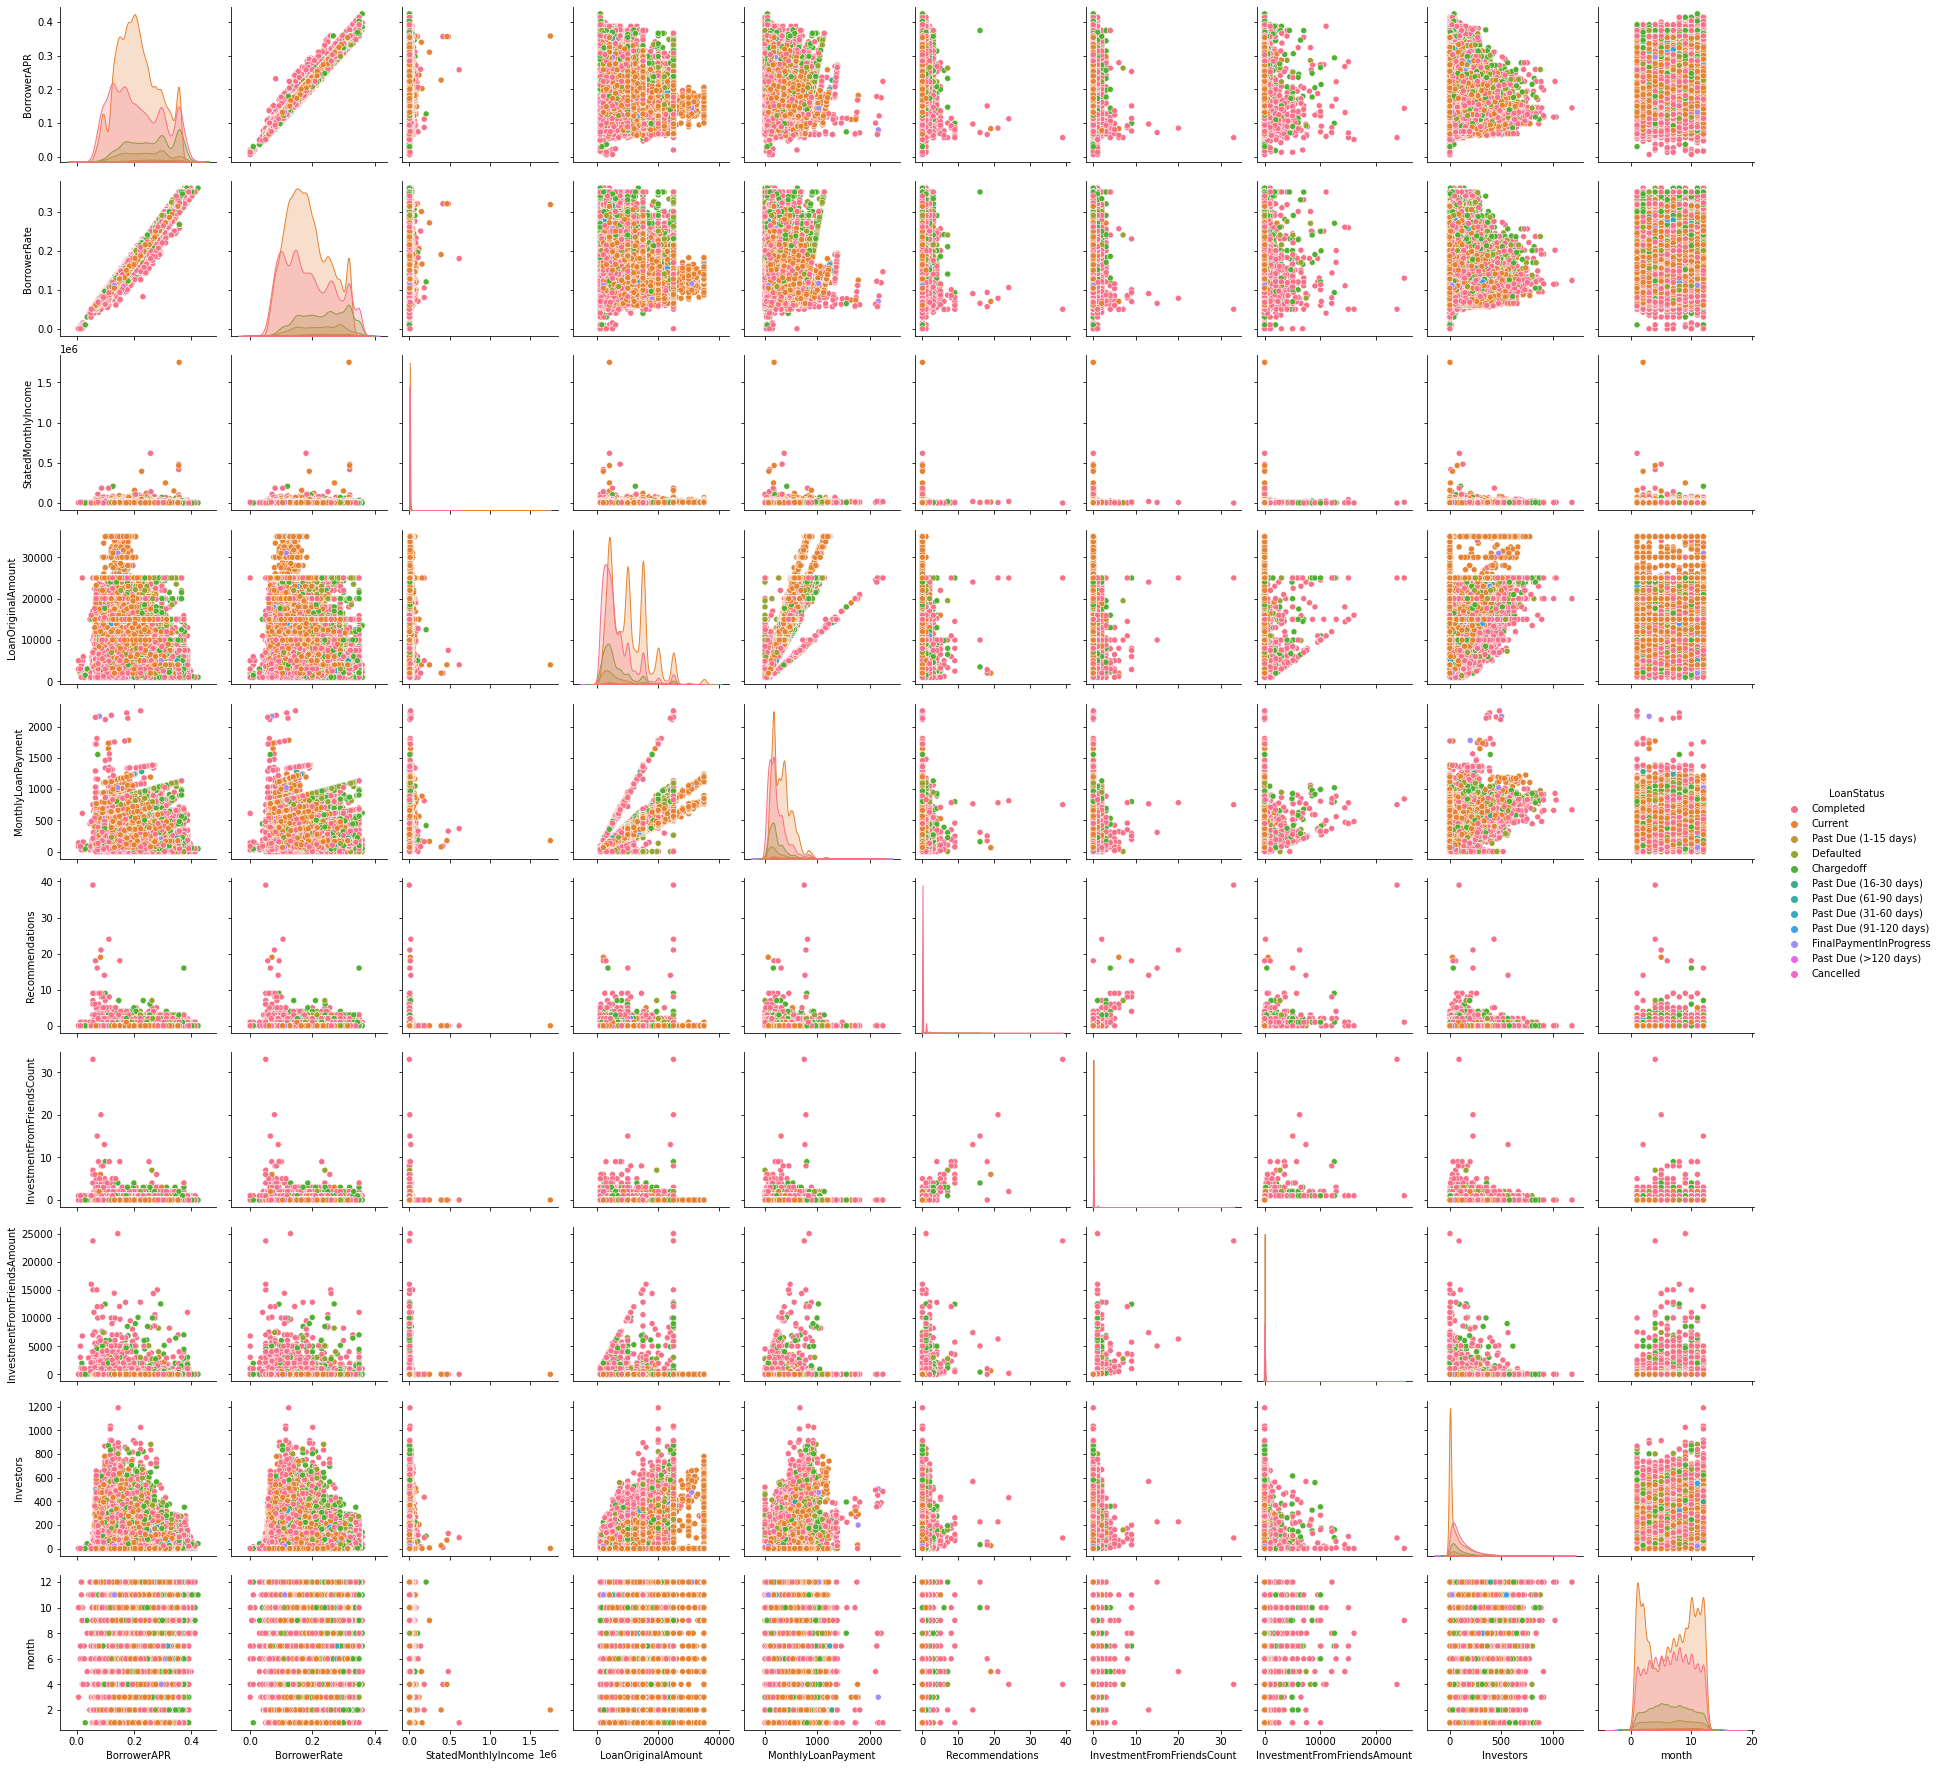

In [883]:
sns.pairplot(data = df_clean , hue = 'LoanStatus'  , diag_kind = 'kde' , palette = 'husl');

#### **Bi-variate visualisations conclusions:**


From above graphs the below conclusions can be drawn:

   - while completed loans enjoy an average rate of 0.18% its driven by many outliers in respct to Loan original amount 
   - High correlation between borrower APR and rate which is reasonable to see the interest rate for the loan related to the annual percentage rate
   - In addition a strong relation between loan monthly payment and loan original amount can be observed in the pairplot 


## Multivariate Exploration


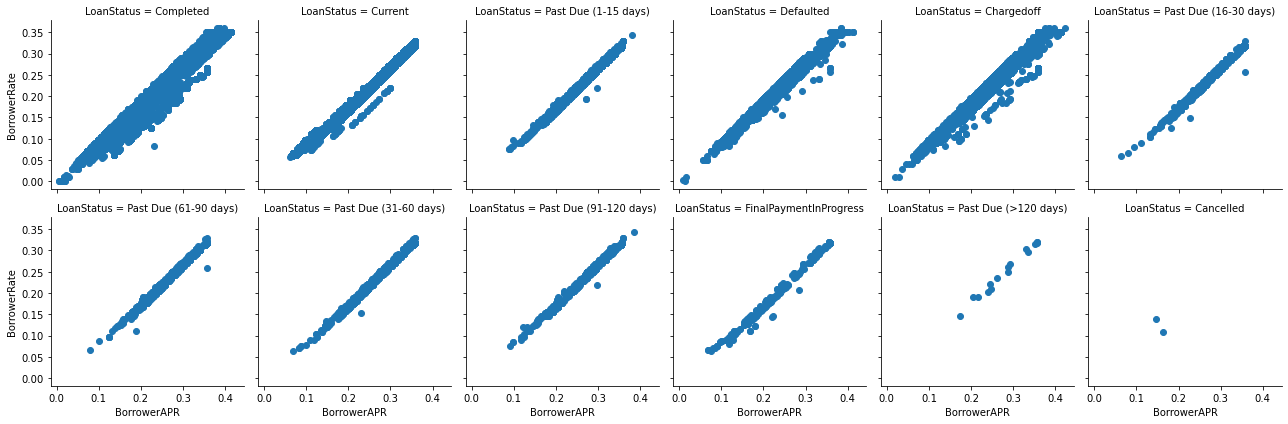

In [855]:
## relation between 3 variables 
# Borrower APR vs Rate

g = sns.FacetGrid(data = df_clean , col = 'LoanStatus' , col_wrap = 6)
g.map(plt.scatter ,  'BorrowerAPR' ,  'BorrowerRate');

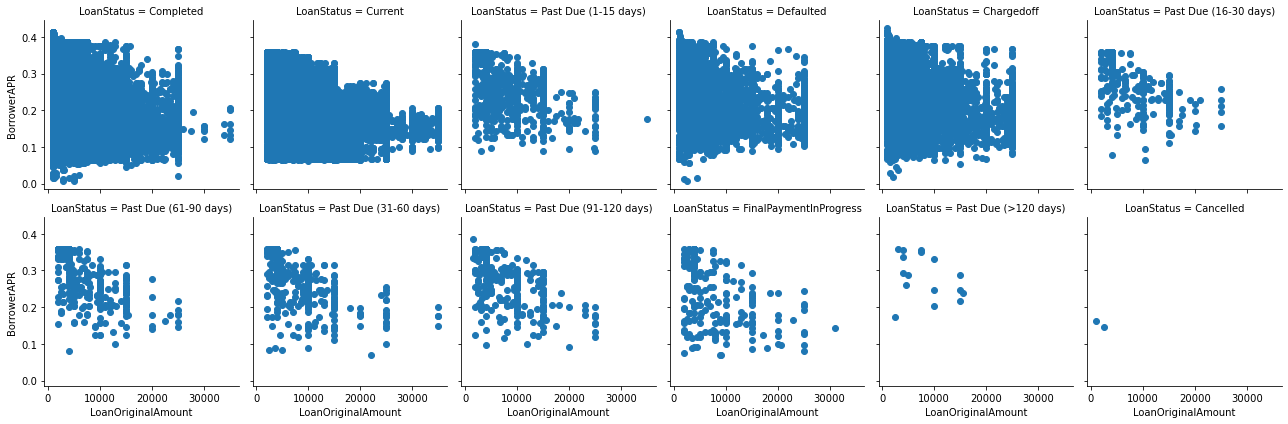

In [851]:
## relation between 3 variables
# Borrower APR vs Loan original amount

g = sns.FacetGrid(data = df_clean ,  col = 'LoanStatus', col_wrap = 6 );
g.map(plt.scatter ,  'LoanOriginalAmount' ,  'BorrowerAPR');

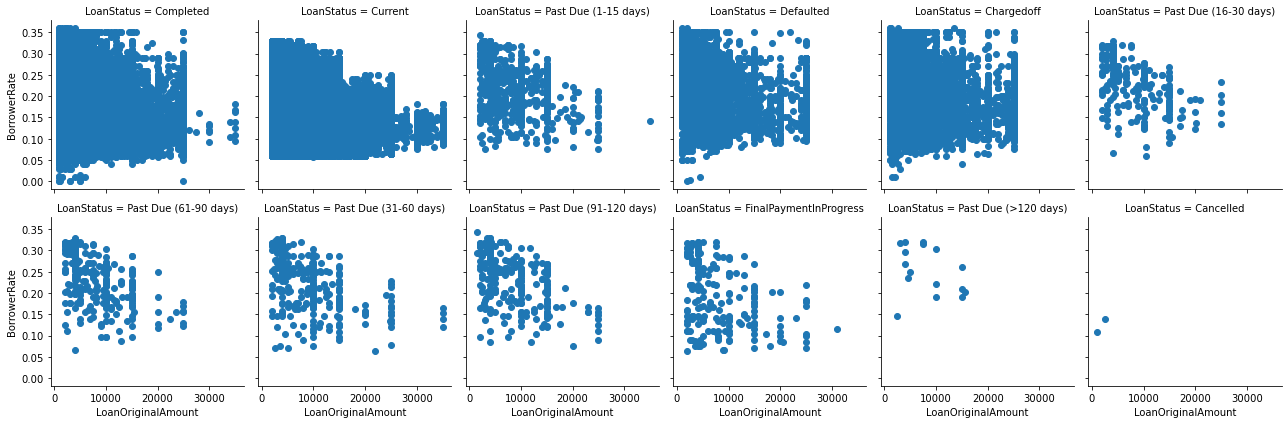

In [853]:
## relation between 3 variables 
# Borrower rate vs Loan original amount

g = sns.FacetGrid(data = df_clean , col = 'LoanStatus' , col_wrap = 6)
g.map(plt.scatter ,  'LoanOriginalAmount' ,  'BorrowerRate');

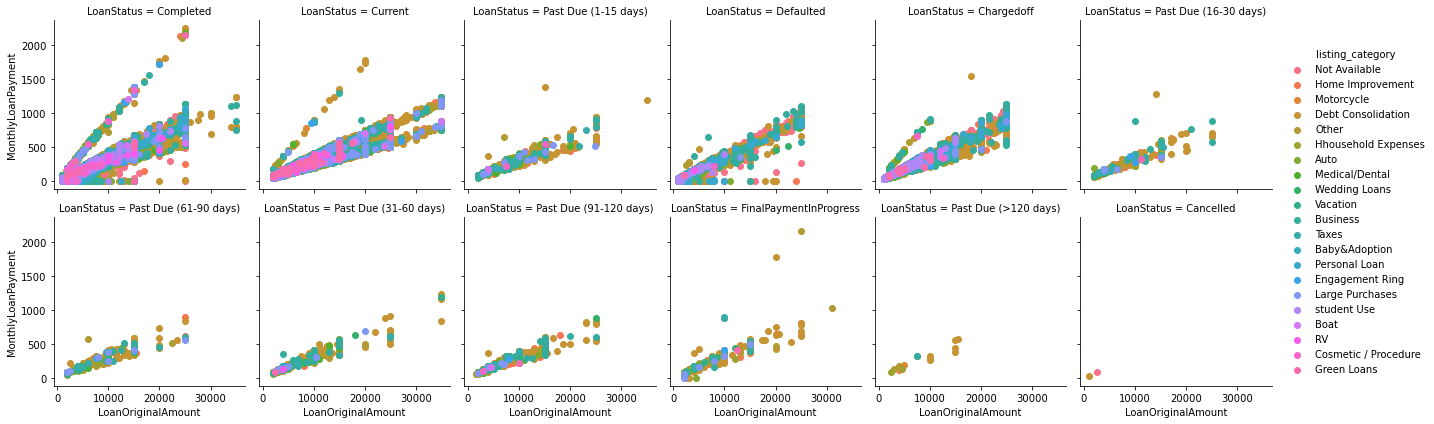

In [881]:
## relation between 4 variables 
# Monthly loan payment vs Loan original amount

g = sns.FacetGrid(data = df_clean , col = 'LoanStatus' , hue = 'listing_category', col_wrap = 6)
g.map(plt.scatter ,  'LoanOriginalAmount' ,  'MonthlyLoanPayment');
g.add_legend();

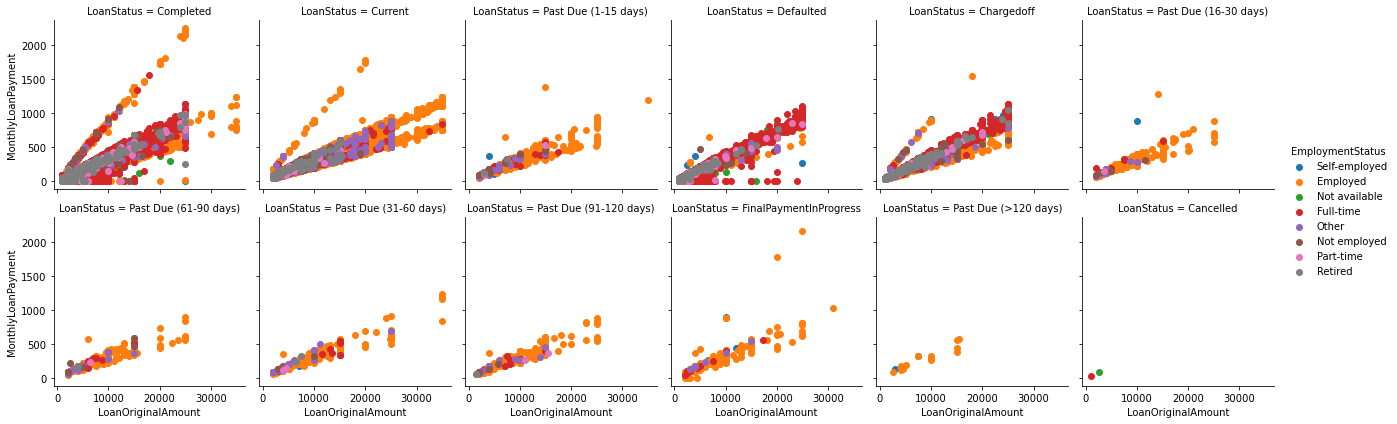

In [882]:
## relation between 4 variables 
# Monthly loan payment vs Loan original amount

g = sns.FacetGrid(data = df_clean , col = 'LoanStatus' , hue = 'EmploymentStatus', col_wrap = 6)
g.map(plt.scatter ,  'LoanOriginalAmount' ,  'MonthlyLoanPayment');
g.add_legend();

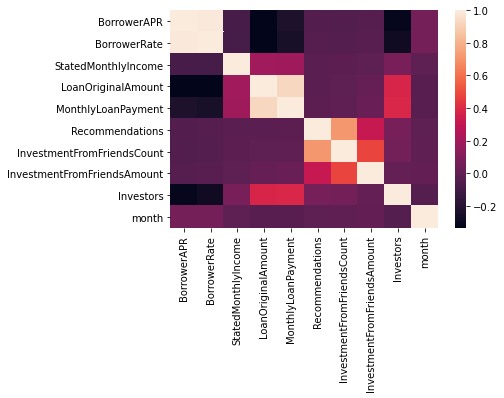

In [889]:
corr = df_clean.corr()
sns.heatmap(corr);

#### **Multi-variate visualisations conclusions:**


From above graphs the below conclusions can be drawn:

   - Strong linear relatoinshop between Loan original amount and monthly loan payments despite of listing category or employment status
   - Same can be seen between both borrower rate and APR uncondtioned of employment status  or the type of listing a borrower selects
   - It becomes harder to interpret the results when comparing 4 varables as seen when adding listing category **however Full time employees seem to have a large defaulted and chargedoff rate as well at high monthly loan payments accompanied by high loan original amount, meanining that fulltime employees are getting higher loans and paying higher monthly loan payments at the same time lots of them are defaulting on loans**

#### Further recommended analysis

> Investigate the relaiton between investors and loan orginal amount , also the number of recommendaitons and number of investors seems to have an intermediate correlation.
> Adding other data sources that can help intereret the variables or understand more about the industry domain to formulate meaningful features 